Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
heart=pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
heart["DEATH_EVENT"].unique()

array([1, 0], dtype=int64)

In [5]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
heart.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Here, we have data between 40-95 years old.
<br><br>Normal value of createning phosphokinase is between 10 mcg/l to 120 mcg/l
<br>Ejection fraction normal range is between 53 and 73%
<br>As we age, our heart ages also age, the walls thickken
<br>E.F below 53 for women and 52 for men is low... E.F <45% is a potential factor for heart issues
<br>HBP increases heart failure chance
<br>Normal platelet range is 150000 to 350000
<br>Normal serum cretinine is 0.84 to 1.21 or 0.6 to 1.21
<br>Creatiine more than 5 may indicate serious kidney impairment
<br>Diabetes may cause high createnine
<br>Normal serum sodium  is 135 to 145


### NORMAL PERSON ANALYSIS

In [7]:
heart[(heart["creatinine_phosphokinase"]>9)&(heart["creatinine_phosphokinase"]<120)&(heart["ejection_fraction"]>50)&
     (heart["ejection_fraction"]<74)&(heart["platelets"]>149999)&
     (heart["platelets"]<351000)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
76,70.0,0,92,0,60,1,317000.0,0.8,140,0,1,74,0
87,65.0,1,68,1,60,1,304000.0,0.8,140,1,0,79,0
97,70.0,1,59,0,60,0,255000.0,1.1,136,0,0,85,0
116,60.0,1,96,1,60,1,271000.0,0.7,136,0,0,94,0
118,65.0,1,113,1,60,1,203000.0,0.9,140,0,0,94,0
136,65.0,1,59,1,60,0,172000.0,0.9,137,0,0,107,0
151,62.0,0,30,1,60,1,244000.0,0.9,139,1,0,117,0
175,60.0,1,95,0,60,0,337000.0,1.0,138,1,1,146,0
191,64.0,1,62,0,60,0,309000.0,1.5,135,0,0,174,0
202,70.0,0,97,0,60,1,220000.0,0.9,138,1,0,186,0


In [8]:
heart["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

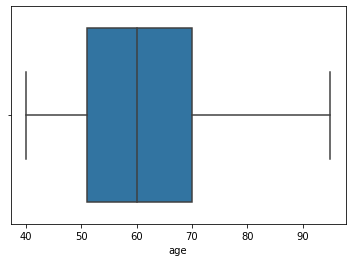

In [9]:
sns.boxplot(heart["age"])

In [10]:
heart["ejection_fraction"].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

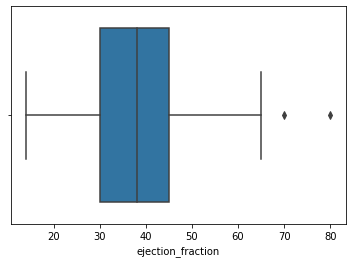

In [11]:
sns.boxplot(heart["ejection_fraction"])

In [12]:
%matplotlib
sns.boxplot(heart["platelets"])

Using matplotlib backend: Qt5Agg


In [13]:
heart=heart[(heart["platelets"]<400000)&(heart["platelets"]>80000)]

In [14]:
heart=heart[heart["ejection_fraction"]<70]

In [15]:
sns.boxplot(heart["serum_creatinine"])

In [16]:
heart["serum_creatinine"].describe()

count    270.000000
mean       1.373556
std        0.963733
min        0.600000
25%        0.900000
50%        1.100000
75%        1.400000
max        9.400000
Name: serum_creatinine, dtype: float64

In [17]:
heart[heart["serum_creatinine"]>5]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
28,58.0,1,60,0,38,0,153000.00,5.8,134,1,0,26,1
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
131,60.0,1,1082,1,45,0,250000.00,6.1,131,1,0,107,0


In [18]:
sns.boxplot(heart["serum_sodium"])

In [19]:
heart["sex"]=heart["sex"].apply(lambda x:"male" if x==1 else "female")

In [20]:
sns.countplot(heart["sex"])

More males than females

In [21]:
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,male,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,male,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,male,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,male,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,female,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,male,1,270,0
294,62.0,0,61,1,38,1,155000.00,1.1,143,male,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,female,0,271,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,male,1,280,0


time is Follow up period in days

### CREATININE PHOSPHASE TO DEATH

In [22]:
plt.figure(figsize=(30,18))
sns.countplot(heart[(heart["creatinine_phosphokinase"]>9)&(heart["creatinine_phosphokinase"]<121)]["creatinine_phosphokinase"],hue=heart["DEATH_EVENT"])

The highest deaths had creatinine of 23,46 ,60,68,69,70,76,81,94,99,104,110-113

THe range is still in the normal level range that's why we did'nt get so much deaths

### DIABETES TO DEATH

In [23]:
sns.countplot(heart["diabetes"],hue=heart["DEATH_EVENT"])

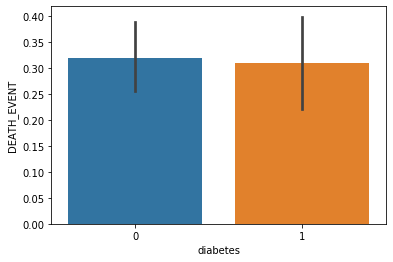

In [24]:
%matplotlib inline
sns.barplot(heart["diabetes"],heart["DEATH_EVENT"])

We see that most people that were diabetes free survived more; but still many people with diabetes also survived

In [25]:
heart[heart["diabetes"]==1]["DEATH_EVENT"].value_counts()

0    78
1    35
Name: DEATH_EVENT, dtype: int64

Most people with diabetes survived

### EJECTION FRACTION TO DEATH

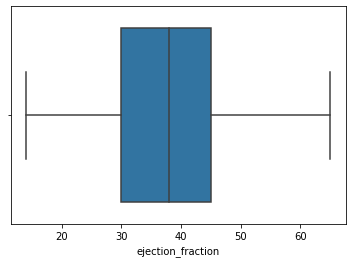

In [26]:
sns.boxplot(heart["ejection_fraction"])

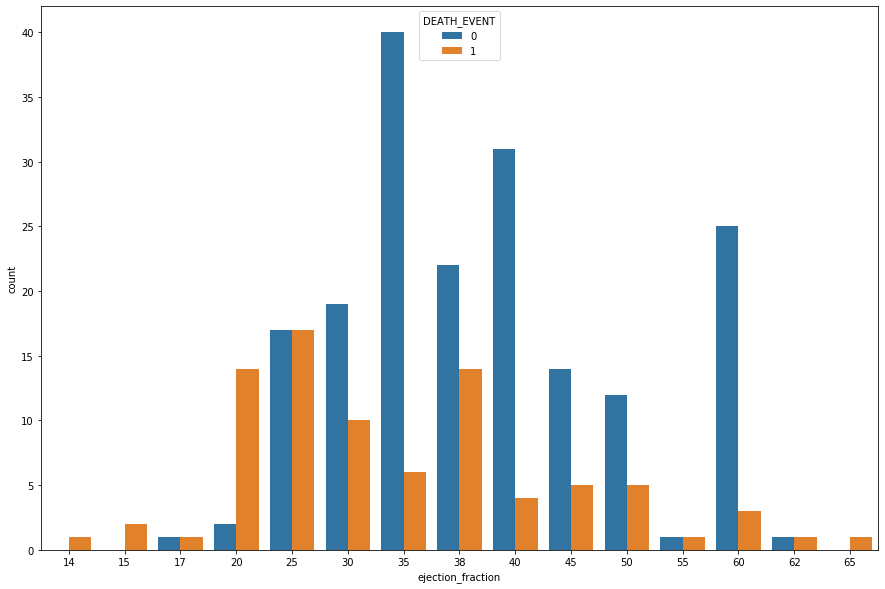

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(heart["ejection_fraction"],hue=heart["DEATH_EVENT"])

We see that most people with very low ejection fraction died but as the ejection fraction reaches 30, most of them survived

### HIGH BLOOD PRESSURE TO DEATH

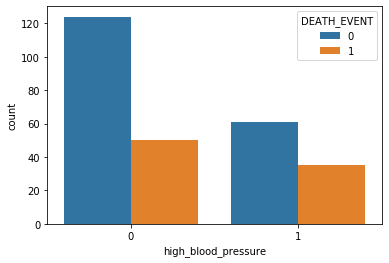

In [28]:
sns.countplot(heart["high_blood_pressure"],hue=heart["DEATH_EVENT"])

### PLATELETS TO DEATH

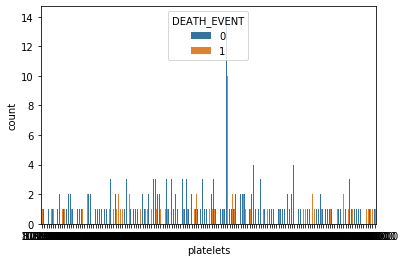

In [29]:
%matplotlib inline
sns.countplot(heart["platelets"],hue=heart["DEATH_EVENT"])

In [30]:
heart[heart["platelets"]<150000]["DEATH_EVENT"].value_counts()

0    13
1     7
Name: DEATH_EVENT, dtype: int64

In [31]:
heart[heart["platelets"]>350000]["DEATH_EVENT"].value_counts()

0    13
1    10
Name: DEATH_EVENT, dtype: int64

In [32]:
heart[(heart["platelets"]>=150000)&(heart["platelets"]<=350000)]["DEATH_EVENT"].value_counts()

0    159
1     68
Name: DEATH_EVENT, dtype: int64

### SERUM CREATININE

In [33]:
heart["serum_creatinine"]

0      1.9
1      1.1
2      1.3
3      1.9
4      2.7
      ... 
293    0.9
294    1.1
295    1.2
297    1.4
298    1.6
Name: serum_creatinine, Length: 270, dtype: float64

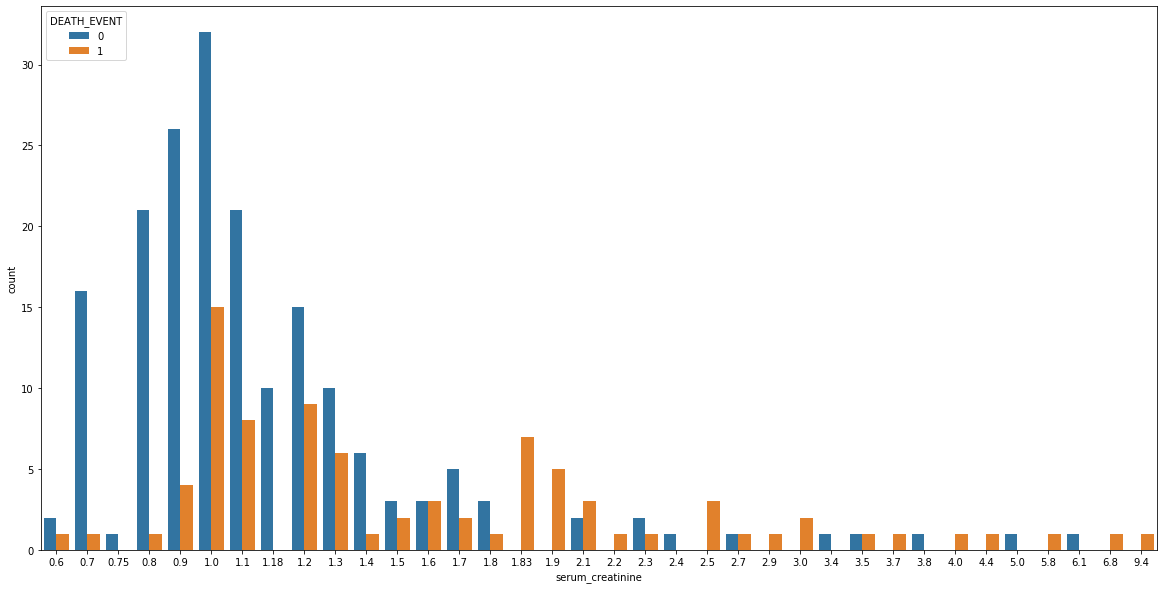

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(heart["serum_creatinine"],hue=heart["DEATH_EVENT"])

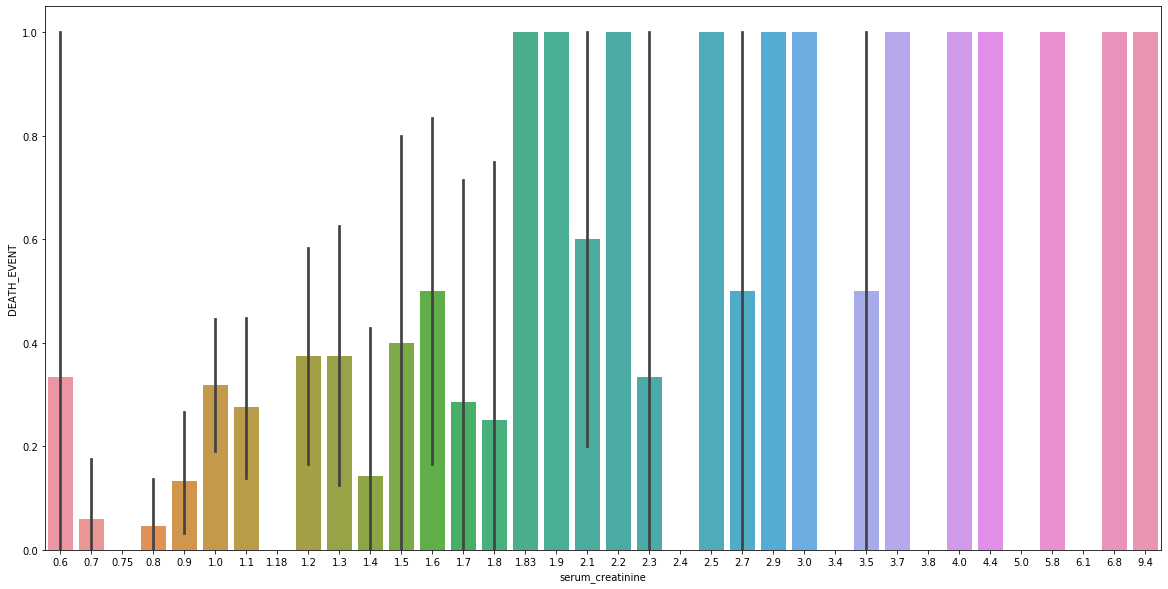

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(heart["serum_creatinine"],heart["DEATH_EVENT"])


In [36]:
heart[(heart["serum_creatinine"]>0.8)&(heart["serum_creatinine"]<=1.2)]["DEATH_EVENT"].value_counts()

0    104
1     36
Name: DEATH_EVENT, dtype: int64

Most people in the normal createnine range survived but most people with extreme createnine values died

### SERUM SODIUM

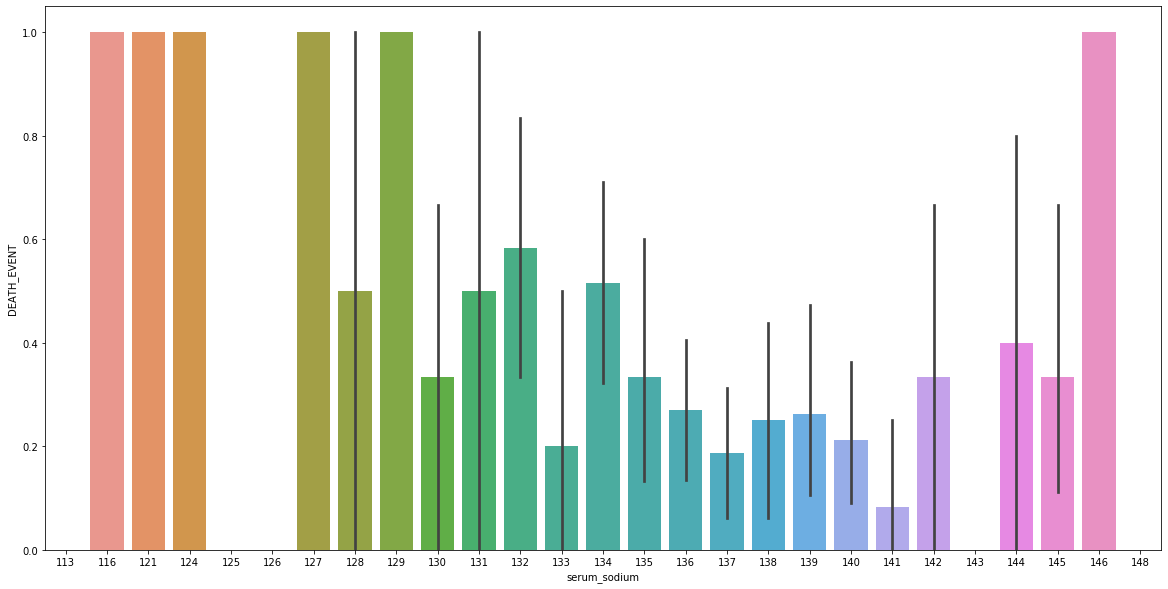

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(heart["serum_sodium"],heart["DEATH_EVENT"])


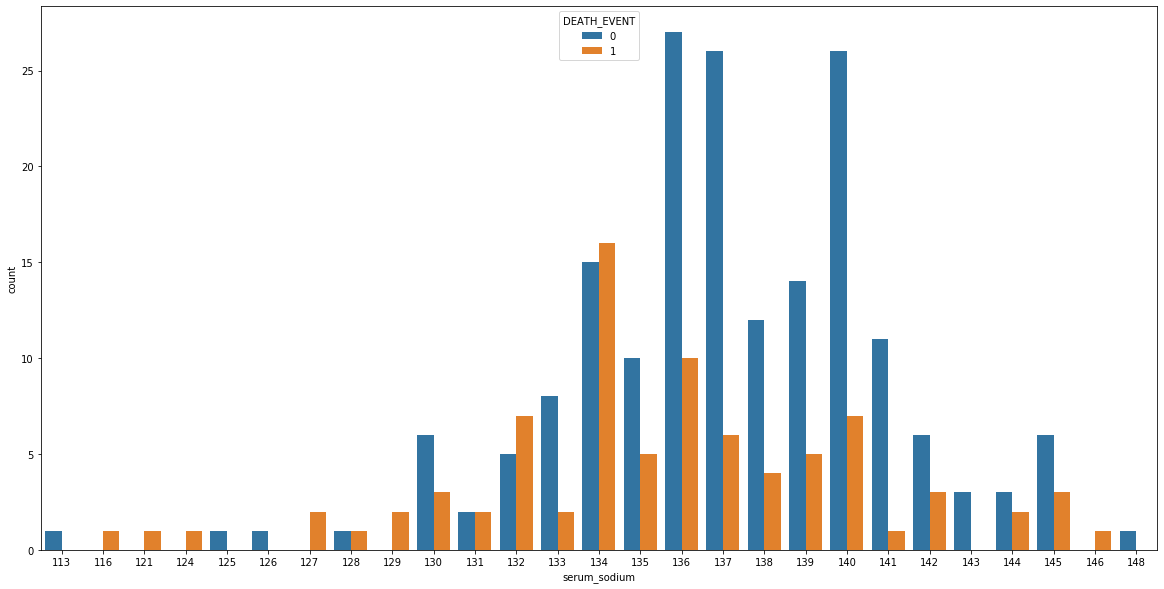

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(heart["serum_sodium"],hue=heart["DEATH_EVENT"])


Serum sodium less than 133 recorded many deaths and serum sodium values greater than 145 recorded many deaths too

In [39]:
heart[(heart["serum_sodium"]<133)|(heart["serum_sodium"]>145)]["DEATH_EVENT"].value_counts()

1    21
0    18
Name: DEATH_EVENT, dtype: int64

SO , at low values and extreme values of serum sodium, more deaths may occur

### SMOKING

In [40]:
heart[heart["smoking"]==1]["DEATH_EVENT"].value_counts()

0    62
1    27
Name: DEATH_EVENT, dtype: int64

### TIME

In [41]:
heart["time"]

0        4
1        6
2        7
3        7
4        8
      ... 
293    270
294    270
295    271
297    280
298    285
Name: time, Length: 270, dtype: int64

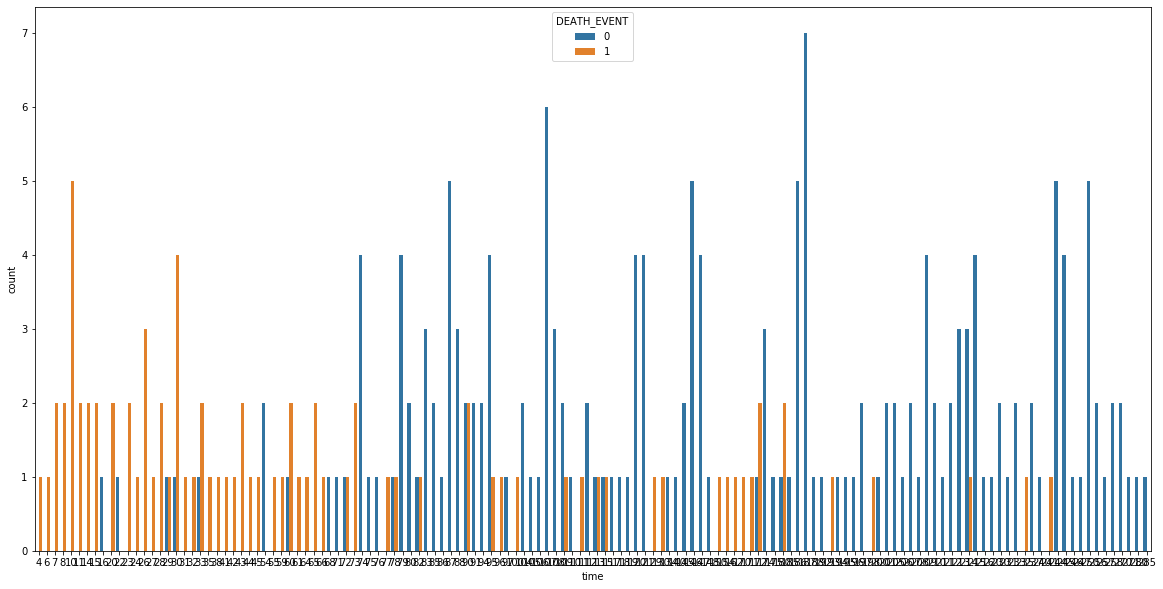

In [42]:
plt.figure(figsize=(20,10))

sns.countplot(heart["time"],hue=heart["DEATH_EVENT"])

In [43]:
heart[heart["time"]<73]["DEATH_EVENT"].value_counts()

1    55
0    11
Name: DEATH_EVENT, dtype: int64

We see that follow up days less than 73 recorded more deaths by a large margin

### DATA MODELLING

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
model=ExtraTreesClassifier()

In [46]:
X=heart.drop(["DEATH_EVENT","sex"],axis="columns")
y=heart["DEATH_EVENT"]

In [47]:
model.fit(X,y)

ExtraTreesClassifier()

In [48]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.10000036 0.03263789 0.07288303 0.02919544 0.13739728 0.02251613
 0.07248247 0.12135144 0.0794046  0.02588357 0.30624777]


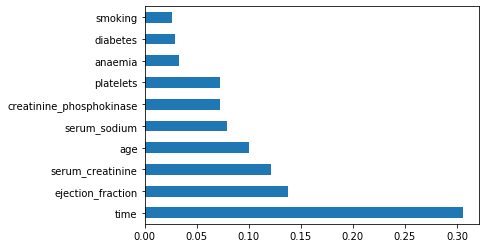

In [49]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [165]:
X=heart[["time","ejection_fraction","serum_creatinine","age","platelets","creatinine_phosphokinase"]]
y=heart["DEATH_EVENT"]

In [166]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [167]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
Xtrain=scale.fit_transform(Xtrain)
Xtest=scale.transform(Xtest)

In [168]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=61,test_size=0.2)

In [169]:
ytrain.shape

(216,)

In [170]:
models={"svc":{
    "model":SVC()
},
        "dtc":{
            "model":DecisionTreeClassifier()
        },
       "rfc":{
            "model":RandomForestClassifier()
        },
        "lr":{
            "model":LogisticRegression()
        },
        "gbc":{
            "model":GradientBoostingClassifier()
        },
        "knc":{
            "model":KNeighborsClassifier()
        },
       
       
       }

In [171]:
for name,modell in models.items():
    mod=modell["model"].fit(Xtrain,ytrain)
    ypred=mod.predict(Xtest)
    print(f"The accuracy of {name} is {accuracy_score(ypred,ytest)}")

The accuracy of svc is 0.7777777777777778
The accuracy of dtc is 0.8148148148148148
The accuracy of rfc is 0.9259259259259259
The accuracy of lr is 0.8703703703703703
The accuracy of gbc is 0.9259259259259259
The accuracy of knc is 0.6666666666666666


C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [172]:
#for i in range(0,100):
 #   for name,modell in models.items():
  #      Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=i,test_size=0.2)
   #     mod=modell["model"].fit(Xtrain,ytrain)
    #    ypred=mod.predict(Xtest)
     #   print(f"The accuracy of {name} for random {i} is {accuracy_score(ytest,ypred)}")

In [173]:
for i in range(1,100):
    rfc=RandomForestClassifier(random_state=i).fit(Xtrain,ytrain)
    ypred=rfc.predict(Xtest)
    #print(f"The accuracy for random {i} is {accuracy_score(ytest,ypred)}")

In [174]:
rfc=RandomForestClassifier(random_state=72)
rfc.fit(Xtrain,ytrain)
ypred=rfc.predict(Xtest)
print(f"The accuracy is {accuracy_score(ypred,ytest)}")

The accuracy is 0.9629629629629629


In [175]:
mat=confusion_matrix(ytest,ypred)
mat

array([[42,  0],
       [ 2, 10]], dtype=int64)

Text(0.5, 1, 'GETTING ACTUAL AND MISLABELLED DATA POINTS')

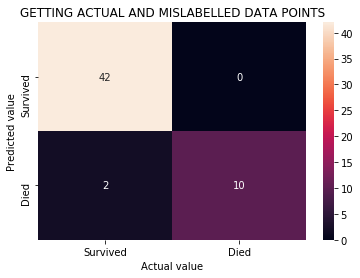

In [176]:
sns.heatmap(mat,annot=True,xticklabels=["Survived","Died"],yticklabels=["Survived","Died"])
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("GETTING ACTUAL AND MISLABELLED DATA POINTS")

In [177]:
pd.DataFrame({"Actual":ytest,"Predicted":ypred})

,Actual,Predicted
209,0,0
203,0,0
276,0,0
34,1,1
154,0,0
165,1,0
172,0,0
171,0,0
231,0,0
187,1,1


In [178]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.83      0.91        12

    accuracy                           0.96        54
   macro avg       0.98      0.92      0.94        54
weighted avg       0.96      0.96      0.96        54



In [179]:
from sklearn.metrics import precision_recall_curve
precision ,recall,thresholds=precision_recall_curve(ytest,ypred)

In [180]:
precision

array([0.22222222, 1.        , 1.        ])

In [181]:
recall

array([1.        , 0.83333333, 0.        ])

In [182]:
thresholds

array([0, 1], dtype=int64)

In [185]:
pickle.dump(rfc,open("model3.pkl","wb"))


In [186]:
model3=pickle.load(open("model3.pkl","rb"))
